<font size=5><center> TP_3 </center></font>
<br>
<font size=4><center><i>Introduction au bootstrap et au méthodes gloutonnes</i></center></font>

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Exercice-1" data-toc-modified-id="Exercice-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercice 1</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-1:-Tracer-sur-un-graphique-p(α)" data-toc-modified-id="Quetsion-1:-Tracer-sur-un-graphique-p(α)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><u>Quetsion 1:</u> <i>Tracer sur un graphique p(α)</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-2:-Générer-n-=-100-vecteurs-aléatoires" data-toc-modified-id="Quetsion-2:-Générer-n-=-100-vecteurs-aléatoires-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><u>Quetsion 2:</u> <i>Générer n = 100 vecteurs aléatoires</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-3:-Pour-α=2-calculer-θα" data-toc-modified-id="Quetsion-3:-Pour-α=2-calculer-θα-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><u>Quetsion 3:</u> <i>Pour α=2 calculer θα</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-4:-Calculer-estimateur-θ*_chapα-en-utilisant-un-bootstrap-des-résidus" data-toc-modified-id="Quetsion-4:-Calculer-estimateur-θ*_chapα-en-utilisant-un-bootstrap-des-résidus-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><u>Quetsion 4:</u> <i>Calculer estimateur θ*_chapα en utilisant un bootstrap des résidus</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-5:-Estimateur-de-la-matrice-de-variance" data-toc-modified-id="Quetsion-5:-Estimateur-de-la-matrice-de-variance-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><u>Quetsion 5:</u> <i>Estimateur de la matrice de variance</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-6:-Choisir-le-meilleur-α" data-toc-modified-id="Quetsion-6:-Choisir-le-meilleur-α-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><u>Quetsion 6:</u> <i>Choisir le meilleur α</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-7:-Distribution-de-Cauchy-pour-l'erreur" data-toc-modified-id="Quetsion-7:-Distribution-de-Cauchy-pour-l'erreur-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span><u>Quetsion 7:</u> <i>Distribution de Cauchy pour l'erreur</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-8:-Même-travail-sur-la-base-diabetese" data-toc-modified-id="Quetsion-8:-Même-travail-sur-la-base-diabetese-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span><u>Quetsion 8:</u> <i>Même travail sur la base diabetese</i></a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Exercice-2" data-toc-modified-id="Exercice-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercice 2</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-9:-Standardiser-les-données" data-toc-modified-id="Quetsion-9:-Standardiser-les-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><u>Quetsion 9:</u> <i>Standardiser les données</i></a></span></li><li><span><a href="http://localhost:8888/notebooks/TP3/TP_3.ipynb#Quetsion-10:-Fonction-stpforward" data-toc-modified-id="Quetsion-10:-Fonction-stpforward-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><u>Quetsion 10:</u> <i>Fonction stpforward</i></a></span></li></ul></li></ul></div>

In [1]:
from sklearn.preprocessing import scale
from scipy.optimize import minimize
import statsmodels.datasets as sd
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy import linalg
import pandas as pd
import numpy as np
import warnings
import seaborn
import pickle

%matplotlib inline

# Exercice 1
## <u>Quetsion 1:</u> <i>Tracer sur un graphique p(α)</i> 

Moyenne de nos x: 0.0
Minimum de nos x: -5.0
Maximum de nos x: 5.0


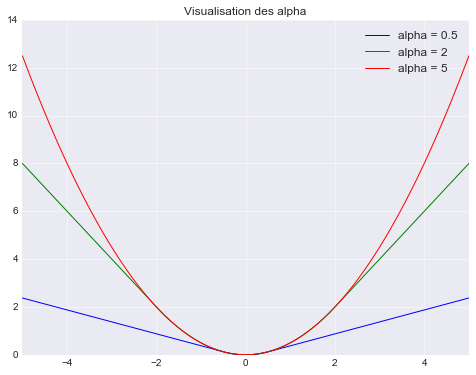

In [2]:
def ro_alpha(alpha, x_val):
    if abs(x_val) <= alpha:
        return x_val**2 /2.
    return (alpha*abs(x_val) - (alpha**2)/2.)

x = np.linspace(-5, 5, 1000)
print("Moyenne de nos x:", x.mean())
print("Minimum de nos x:", x.min())
print("Maximum de nos x:", x.max())

val_alpha_05 = [ro_alpha(.5, x_val) for x_val in x]
val_alpha_2 = [ro_alpha(2, x_val) for x_val in x]
val_alpha_5 = [ro_alpha(5, x_val) for x_val in x]

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(8, 6))
plt.plot(x, val_alpha_05)
plt.plot(x, val_alpha_2)
plt.plot(x, val_alpha_5)
plt.xlim([-5, 5])
plt.title("Visualisation des alpha")
plt.legend(["alpha = 0.5", "alpha = 2", "alpha = 5"])
plt.show()

<font> L'effet de alpha sur l'estimateur θ: </font>

## <u>Quetsion 2:</u> <i>Générer n = 100 vecteurs aléatoires</i> 

In [3]:
d = 2
X_init = np.random.uniform(0, 1, size=(100, d))
err_normal = np.reshape(np.random.normal(0, 1, 100), (100, 1))
theta = np.array([[1], [1], [1]]) # taille de d

y_init = np.ones((100, 1)) + np.dot(X_init, theta[1:]) + err_normal
print("Taille de y:", len(y_init), "\nShape de X:", X_init.shape)

Taille de y: 100 
Shape de X: (100, 2)


## <u>Quetsion 3:</u> <i>Pour α=2 calculer θα</i> 

In [7]:
def func_to_minimize(theta_chap, X, y, alpha):
    res = 0
    for i in range(len(X)):
        res += ro_alpha(alpha, (y[i] - theta_chap[0] - (np.dot(X[i, :], theta_chap[1:]))))
    sum_res = res
    return sum_res


def get_estimator(X, y, alpha):
    return minimize(func_to_minimize, np.ones(X.shape[1] + 1), args=(X, y, alpha),
                    method='nelder-mead', options={'xtol': 1e-5}).x


alpha = 2
estim_theta = get_estimator(X_init, y_init, alpha)
print("Estimateur de θ0:", estim_theta[0])
print("Estimateur de θ1:", estim_theta[1])
print("Estimateur de θ2:", estim_theta[2])

Estimateur de θ0: 0.731724288939
Estimateur de θ1: 1.1566036319
Estimateur de θ2: 1.2093310093


## <u>Quetsion 4:</u> <i>Calculer estimateur θ*_chapα en utilisant un bootstrap des résidus</i> 

In [8]:
def bootstrap_resample(X, n=None):
    if n == None:
        n = len(X)   
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

alpha = 2
err_b = bootstrap_resample(err_normal, n=None)
y_b = np.ones((len(X_init), 1)) + np.dot(X_init, theta[1:]) + err_b
estim_theta_b = get_estimator(X_init, y_b, alpha)

print("Estimateur de θ:", estim_theta_b)

Estimateur de θ: [ 0.97241821  1.35420753  0.46351185]


## <u>Quetsion 5:</u> <i>Estimateur de la matrice de variance</i> 

In [ ]:
np.cov(v, rowvar=False)

In [20]:
all_estim_b[:10]

[[0.87778907814680784, 0.69241510650485161, 1.5738270605643443],
 [0.64810688539930572, 0.87019258298249857, 1.394481046484163],
 [0.99602081941109577, 1.2214964126907815, 0.87595099260635023],
 [1.1211609141977803, 0.58064471379507565, 1.1665009792679253],
 [0.65792527040151649, 1.0690170138963153, 1.3454572202667205],
 [0.90207938072854188, 0.84124184643915267, 1.1929717222778371],
 [0.67124291361012933, 1.3338537276618068, 1.0165090808652151],
 [1.2922712791338693, 0.96110440307277156, 0.27453176850671746],
 [0.38831626065976643, 1.3805606764460721, 1.6172142351027388],
 [1.0007042160247406, 0.76491929176472651, 1.048716975781357]]

In [22]:
def get_bootstrap_estim(X, theta, alpha, err):
    estim_theta_b_n = []
    for i in range(200):
        err_b = bootstrap_resample(err)
        y_b = np.ones((len(X), 1)) + np.dot(X, theta) + err_b
        estim_theta_b = get_estimator(X, y_b, alpha)
        estim_theta_b_n.append(list(estim_theta_b))
    return estim_theta_b_n

my_alpha = 2
all_estim_b = get_bootstrap_estim(X_init, theta[1:], my_alpha, err_normal)


# Variance #
def get_variance(all_estim_b):
    return np.cov(all_estim_b, rowvar=False)

variance = get_variance(all_estim_b)
print("Variance:\n", variance)


# Biais #
def get_biais(all_estim_b, X_main_data, y_main_data, alpha):
    est_boot_mean = []
    biais_est = []
    estim_theta = get_estimator(X_main_data, y_main_data, alpha)
    for f in range(len(estim_theta)):
        # append mean of all estim 
        est_boot_mean.append(np.mean([all_estim_b[i][f] for i in range(len(all_estim_b))]))
        biais_est.append(est_boot_mean[-1] - estim_theta[f])
    return biais_est

biais_est = get_biais(all_estim_b, X_init, y_init, 2)
biais_est1 = biais_est[0]
biais_est2 = biais_est[1]
print("Biais l'estimateur 1:", biais_est1)
print("Biais l'estimateur 2:", biais_est2)


# MSE = Biais^2 + Variance
def get_MSE(biais, variance):
    MSE = []
    for f in range(len(biais)):
        MSE.append(biais[f]**2 + variance)
    return np.mean(MSE)
        
MSE_est = get_MSE(biais_est, variance)
print("MSE:", MSE_est)

Variance:
 [[ 0.07156831 -0.05488457 -0.054861  ]
 [-0.05488457  0.10112272 -0.00928875]
 [-0.054861   -0.00928875  0.11277028]]
Biais l'estimateur 1: 0.146122388855
Biais l'estimateur 2: -0.145714873918
MSE: 0.0282454111321


In [14]:
#Biais
matrix_all_estim_b = np.reshape(all_estim_b, (len(all_estim_b), len(theta)))
np.linalg.norm(estim_theta - matrix_all_estim_b)

8.4201712711697763

## <u>Quetsion 6:</u> <i>Choisir le meilleur α</i> 

In [15]:
def get_range_mse(X, y, theta, err, low, high, step):
    MSE = {}
    for i in np.arange(low, high, step):
        all_estim_b = get_bootstrap_estim(X, theta, i, err)
        variance_est = get_variance(all_estim_b)
        biais_est = get_biais(all_estim_b, X, y, i)
        mse = get_MSE(biais_est, variance_est)
        MSE[i] = mse
    return MSE

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

#all_mse_normal_dict = get_range_mse(X_init, y_init, theta[1:], err_normal, 0, 10, 0.5)
#save_obj(all_mse_normal_dict, "mse_normal_dict")
mse_normal_dict = load_obj("mse_normal_dict")
len(mse_normal_dict)

20

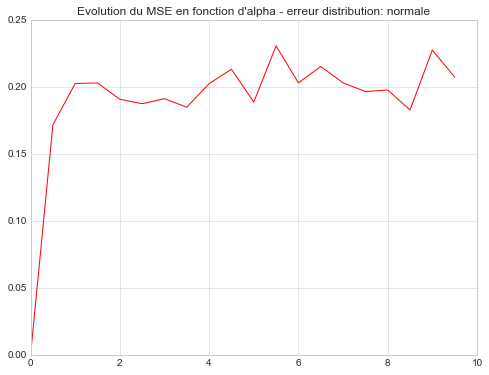

In [16]:
def draw_mse_alpha(mse_dict, title):
    keys_float = [float(k) for k in mse_dict.keys()]
    values_float = [float(v) for v in mse_dict.values()]
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(8, 6))
    plt.plot(keys_float, values_float, color="red")
    plt.title(title)
    return plt

plt_mse_normal = draw_mse_alpha(mse_normal_dict,
                               "Evolution du MSE en fonction d'alpha - erreur distribution: normale")
plt_mse_normal.show()

## <u>Quetsion 7:</u> <i>Distribution de Cauchy pour l'erreur</i> 

In [62]:
err_cauchy = np.reshape(np.random.standard_cauchy(len(X_init)), (len(X_init), 1))

#all_mse_cauchy = get_range_mse(X_init, y_init, theta[1:], err_cauchy, 0, 10, 0.5)
#save_obj(all_mse_cauchy, "mse_cauchy_dict")
mse_dict_cauchy = load_obj("mse_cauchy_dict")
len(mse_dict_cauchy)

20

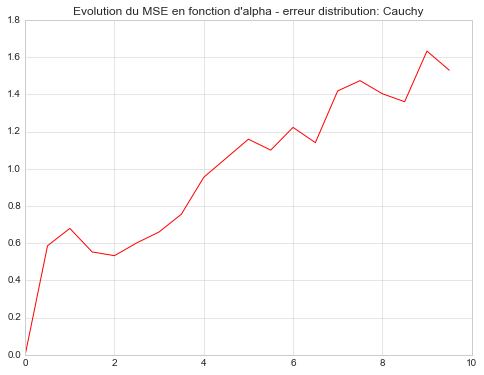

In [63]:
plt_mse_cauchy = draw_mse_alpha(mse_dict_cauchy, 
                                "Evolution du MSE en fonction d'alpha - erreur distribution: Cauchy")
plt_mse_cauchy.show()

## <u>Quetsion 8:</u> <i>Même travail sur la base diabetese</i> 

In [65]:
diabetes = datasets.load_diabetes()
X_diab_all = diabetes.data
X_diab = [X_diab_all[i][3] for i in range(len(X_diab_all))]
X_diab_vect = np.reshape(X_diab, (len(X_diab), 1))
y_diab = diabetes.target
theta_diab = np.array([[1]])
err_cauchy_diab = np.reshape(np.random.standard_cauchy(len(X_diab_vect)), (len(X_diab_vect), 1))

X_diab_vect = np.reshape(X_diab, (len(X_diab), 1))

all_mse_diab = get_range_mse(X_diab_vect, y_diab, theta_diab, err_cauchy_diab, 0, 10, 0.5)
#save_obj(all_mse_diab, "mse_diab_dict")
mse_diab_dict = load_obj("mse_diab_dict")

KeyboardInterrupt: 

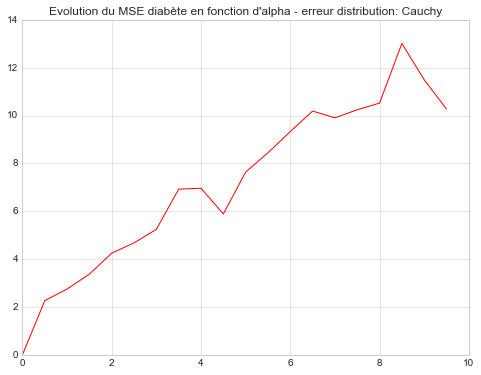

In [14]:
titre = "Evolution du MSE diabète en fonction d'alpha - erreur distribution: Cauchy"
plt_mse_diab_cauchy = draw_mse_alpha(mse_diab_dict, titre)
plt_mse_diab_cauchy.show()

# Exercice 2
## <u>Quetsion 9:</u> <i>Standardiser les données</i> 

In [16]:
data = sd.get_rdataset('airquality').data
data.head()

In [30]:
df = data.dropna().head()
X_airq = scale(df)


1.0000000000000002

## <u>Quetsion 10:</u> <i>Fonction stpforward</i> 